# Monkey-Pox

In [21]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data

In [22]:
df_raw=pd.read_csv('DATA.csv')
df=df_raw.copy()
df.head()

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,P0,None,False,True,True,True,False,True,False,False,Negative
1,P1,Fever,True,False,True,True,False,False,True,False,Positive
2,P2,Fever,False,True,True,False,False,False,True,False,Positive
3,P3,None,True,False,False,False,True,True,True,False,Positive
4,P4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,Positive


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Patient_ID                      25000 non-null  object
 1   Systemic Illness                25000 non-null  object
 2   Rectal Pain                     25000 non-null  bool  
 3   Sore Throat                     25000 non-null  bool  
 4   Penile Oedema                   25000 non-null  bool  
 5   Oral Lesions                    25000 non-null  bool  
 6   Solitary Lesion                 25000 non-null  bool  
 7   Swollen Tonsils                 25000 non-null  bool  
 8   HIV Infection                   25000 non-null  bool  
 9   Sexually Transmitted Infection  25000 non-null  bool  
 10  MonkeyPox                       25000 non-null  object
dtypes: bool(8), object(3)
memory usage: 781.4+ KB


In [24]:
df.isna().sum()

Patient_ID                        0
Systemic Illness                  0
Rectal Pain                       0
Sore Throat                       0
Penile Oedema                     0
Oral Lesions                      0
Solitary Lesion                   0
Swollen Tonsils                   0
HIV Infection                     0
Sexually Transmitted Infection    0
MonkeyPox                         0
dtype: int64

## Preprocessing

In [25]:
df.drop('Patient_ID',axis=1,inplace=True)

In [26]:
df['Systemic Illness'].nunique()

4

In [27]:
df['Systemic Illness'].unique()

array(['None', 'Fever', 'Swollen Lymph Nodes', 'Muscle Aches and Pain'],
      dtype=object)

In [28]:
Systemic_Illness=pd.get_dummies(df['Systemic Illness'],drop_first=True)

In [29]:
df=pd.concat([df,Systemic_Illness],axis=1)

In [30]:
df.drop('Systemic Illness',axis=1,inplace=True)
df.head()

,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox,Muscle Aches and Pain,None,Swollen Lymph Nodes
0,False,True,True,True,False,True,False,False,Negative,0,1,0
1,True,False,True,True,False,False,True,False,Positive,0,0,0
2,False,True,True,False,False,False,True,False,Positive,0,0,0
3,True,False,False,False,True,True,True,False,Positive,0,1,0
4,True,True,True,False,False,True,True,False,Positive,0,0,1


In [31]:
df.columns

Index(['Rectal Pain', 'Sore Throat', 'Penile Oedema', 'Oral Lesions',
       'Solitary Lesion', 'Swollen Tonsils', 'HIV Infection',
       'Sexually Transmitted Infection', 'MonkeyPox', 'Muscle Aches and Pain',
       'None', 'Swollen Lymph Nodes'],
      dtype='object')

In [32]:
clm=['Rectal Pain', 'Sore Throat', 'Penile Oedema', 'Oral Lesions',
       'Solitary Lesion', 'Swollen Tonsils', 'HIV Infection',
       'Sexually Transmitted Infection']

In [34]:
for i in clm:
    df[i]=df[i].map({False:0,True:1})

In [36]:
df.head()

,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox,Muscle Aches and Pain,None,Swollen Lymph Nodes
0,0,1,1,1,0,1,0,0,Negative,0,1,0
1,1,0,1,1,0,0,1,0,Positive,0,0,0
2,0,1,1,0,0,0,1,0,Positive,0,0,0
3,1,0,0,0,1,1,1,0,Positive,0,1,0
4,1,1,1,0,0,1,1,0,Positive,0,0,1


In [37]:
df['MonkeyPox']=df['MonkeyPox'].map({'Negative':0,'Positive':1})

In [39]:
df.head()

,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox,Muscle Aches and Pain,None,Swollen Lymph Nodes
0,0,1,1,1,0,1,0,0,0,0,1,0
1,1,0,1,1,0,0,1,0,1,0,0,0
2,0,1,1,0,0,0,1,0,1,0,0,0
3,1,0,0,0,1,1,1,0,1,0,1,0
4,1,1,1,0,0,1,1,0,1,0,0,1


<AxesSubplot:xlabel='MonkeyPox', ylabel='count'>

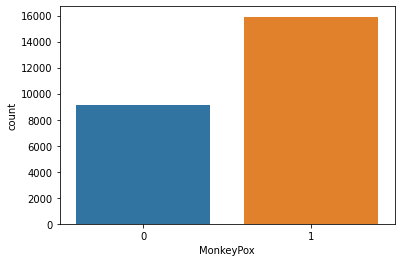

In [40]:
sns.countplot(df['MonkeyPox'])

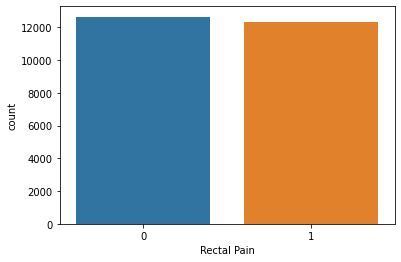

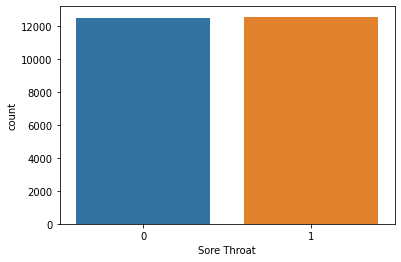

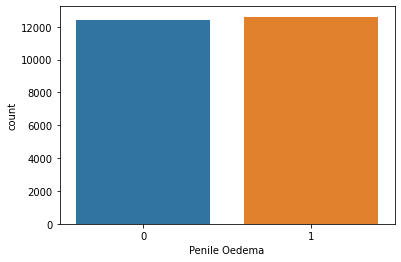

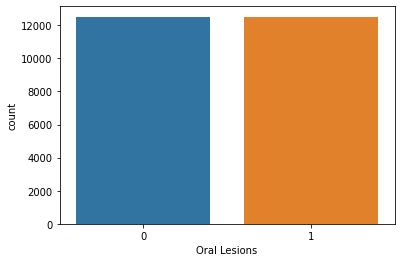

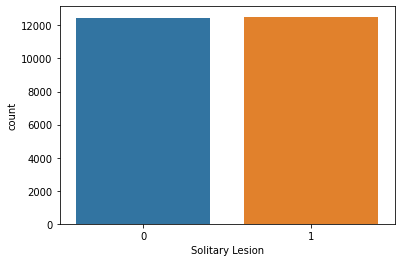

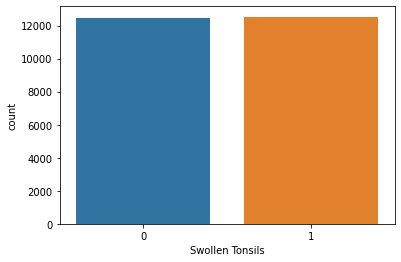

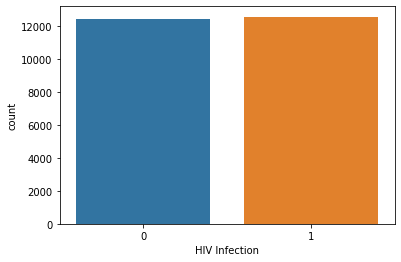

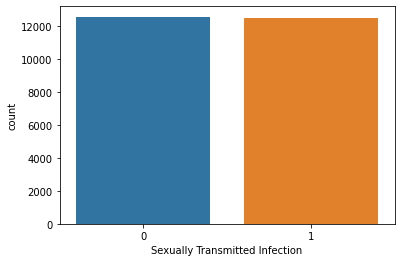

In [42]:
for i in clm:
    sns.countplot(df[i])
    plt.show()

## Training and Test Data

In [43]:
X=df.drop('MonkeyPox',axis=1)
y=df['MonkeyPox']

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Model Preparation

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,accuracy_score

In [52]:
M1=LogisticRegression()
M1.fit(X_train,y_train)
P1=M1.predict(X_test)
print('confusion_matrix')
print(confusion_matrix(y_test,P1))
print('\n')
print('classification_report')
print(classification_report(y_test,P1))
print('\n')
print('Accuracy:',100*accuracy_score(y_test,P1))
print('\n')
print('ROC Value:',roc_auc_score(y_test,P1))

confusion_matrix
[[1058 1635]
 [ 650 4157]]


classification_report
              precision    recall  f1-score   support

           0       0.62      0.39      0.48      2693
           1       0.72      0.86      0.78      4807

    accuracy                           0.70      7500
   macro avg       0.67      0.63      0.63      7500
weighted avg       0.68      0.70      0.68      7500



Accuracy: 69.53333333333333


ROC Value: 0.6288254665745763


## DecisionTree

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
M2=DecisionTreeClassifier()
M2.fit(X_train,y_train)
P2=M2.predict(X_test)
print('confusion_matrix')
print(confusion_matrix(y_test,P2))
print('\n')
print('classification_report')
print(classification_report(y_test,P2))
print('\n')
print('Accuracy:',100*accuracy_score(y_test,P2))
print('\n')
print('ROC Value:',roc_auc_score(y_test,P2))

confusion_matrix
[[1098 1595]
 [ 794 4013]]


classification_report
              precision    recall  f1-score   support

           0       0.58      0.41      0.48      2693
           1       0.72      0.83      0.77      4807

    accuracy                           0.68      7500
   macro avg       0.65      0.62      0.62      7500
weighted avg       0.67      0.68      0.67      7500



Accuracy: 68.14666666666666


ROC Value: 0.6212739714355481


## RandomForest

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
M3=RandomForestClassifier()
M3.fit(X_train,y_train)
P3=M3.predict(X_test)
print('confusion_matrix')
print(confusion_matrix(y_test,P3))
print('\n')
print('classification_report')
print(classification_report(y_test,P3))
print('\n')
print('Accuracy:',100*accuracy_score(y_test,P3))
print('\n')
print('ROC Value:',roc_auc_score(y_test,P3))

confusion_matrix
[[1039 1654]
 [ 739 4068]]


classification_report
              precision    recall  f1-score   support

           0       0.58      0.39      0.46      2693
           1       0.71      0.85      0.77      4807

    accuracy                           0.68      7500
   macro avg       0.65      0.62      0.62      7500
weighted avg       0.67      0.68      0.66      7500



Accuracy: 68.09333333333333


ROC Value: 0.6160404692037258


## Support Vector

In [57]:
from sklearn.svm import SVC

In [58]:
M4=SVC()
M4.fit(X_train,y_train)
P4=M4.predict(X_test)
print('confusion_matrix')
print(confusion_matrix(y_test,P4))
print('\n')
print('classification_report')
print(classification_report(y_test,P4))
print('\n')
print('Accuracy:',100*accuracy_score(y_test,P4))
print('\n')
print('ROC Value:',roc_auc_score(y_test,P4))

confusion_matrix
[[ 896 1797]
 [ 481 4326]]


classification_report
              precision    recall  f1-score   support

           0       0.65      0.33      0.44      2693
           1       0.71      0.90      0.79      4807

    accuracy                           0.70      7500
   macro avg       0.68      0.62      0.62      7500
weighted avg       0.69      0.70      0.67      7500



Accuracy: 69.62666666666667


ROC Value: 0.6163260179350714


## KNN

In [59]:
from sklearn.neighbors import KNeighborsClassifier

Text(0, 0.5, 'Error Rate')

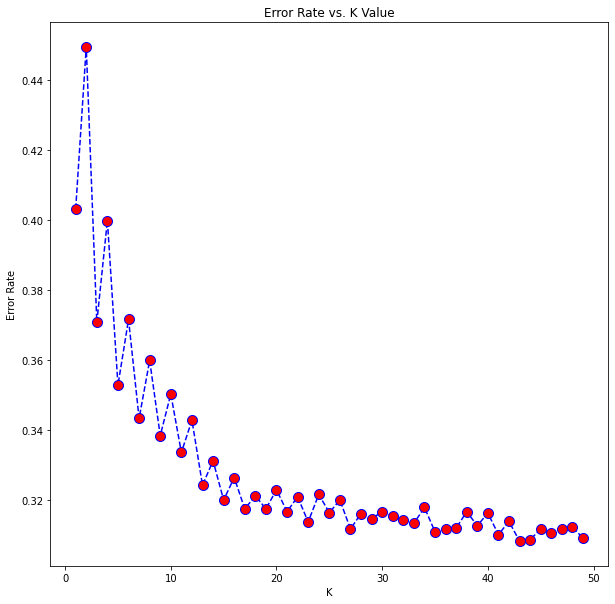

In [60]:
error_Mat=[]
for i in range (1,50):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predict_i=knn.predict(X_test)
    error_Mat.append(np.mean(predict_i != y_test))
plt.figure(figsize=(10,10))
plt.plot(range(1,50),error_Mat,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [61]:
M5=KNeighborsClassifier(n_neighbors=20)
M5.fit(X_train,y_train)
P5=M5.predict(X_test)
print('confusion_matrix')
print(confusion_matrix(y_test,P5))
print('\n')
print('classification_report')
print(classification_report(y_test,P5))
print('\n')
print('Accuracy:',100*accuracy_score(y_test,P5))
print('\n')
print('ROC Value:',roc_auc_score(y_test,P5))

confusion_matrix
[[1137 1556]
 [ 866 3941]]


classification_report
              precision    recall  f1-score   support

           0       0.57      0.42      0.48      2693
           1       0.72      0.82      0.76      4807

    accuracy                           0.68      7500
   macro avg       0.64      0.62      0.62      7500
weighted avg       0.66      0.68      0.66      7500



Accuracy: 67.70666666666668


ROC Value: 0.6210258881809244


## Naive_bayes

In [62]:
from sklearn.naive_bayes import GaussianNB

In [63]:
M6=GaussianNB()
M6.fit(X_train,y_train)
P6=M6.predict(X_test)
print('confusion_matrix')
print(confusion_matrix(y_test,P6))
print('\n')
print('classification_report')
print(classification_report(y_test,P6))
print('\n')
print('Accuracy:',100*accuracy_score(y_test,P6))
print('\n')
print('ROC Value:',roc_auc_score(y_test,P6))

confusion_matrix
[[1307 1386]
 [ 979 3828]]


classification_report
              precision    recall  f1-score   support

           0       0.57      0.49      0.53      2693
           1       0.73      0.80      0.76      4807

    accuracy                           0.68      7500
   macro avg       0.65      0.64      0.64      7500
weighted avg       0.68      0.68      0.68      7500



Accuracy: 68.46666666666667


ROC Value: 0.6408355079403251


## GradientBoostingClassifier

In [64]:
from sklearn.ensemble import GradientBoostingClassifier

In [65]:
M7=GradientBoostingClassifier()
M7.fit(X_train,y_train)
P7=M7.predict(X_test)
print('confusion_matrix')
print(confusion_matrix(y_test,P7))
print('\n')
print('classification_report')
print(classification_report(y_test,P7))
print('\n')
print('Accuracy:',100*accuracy_score(y_test,P7))
print('\n')
print('ROC Value:',roc_auc_score(y_test,P7))

confusion_matrix
[[1003 1690]
 [ 568 4239]]


classification_report
              precision    recall  f1-score   support

           0       0.64      0.37      0.47      2693
           1       0.71      0.88      0.79      4807

    accuracy                           0.70      7500
   macro avg       0.68      0.63      0.63      7500
weighted avg       0.69      0.70      0.68      7500



Accuracy: 69.89333333333333


ROC Value: 0.6271430349245449


## HistGradientBoostingClassifier

In [66]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [67]:
M8=HistGradientBoostingClassifier()
M8.fit(X_train,y_train)
P8=M8.predict(X_test)
print('confusion_matrix')
print(confusion_matrix(y_test,P8))
print('\n')
print('classification_report')
print(classification_report(y_test,P8))
print('\n')
print('Accuracy:',100*accuracy_score(y_test,P8))
print('\n')
print('ROC Value:',roc_auc_score(y_test,P8))

confusion_matrix
[[ 878 1815]
 [ 447 4360]]


classification_report
              precision    recall  f1-score   support

           0       0.66      0.33      0.44      2693
           1       0.71      0.91      0.79      4807

    accuracy                           0.70      7500
   macro avg       0.68      0.62      0.62      7500
weighted avg       0.69      0.70      0.67      7500



Accuracy: 69.84


ROC Value: 0.6165205294204029


## CatBoostClassifier

In [68]:
from catboost import CatBoostClassifier

In [70]:
M9=CatBoostClassifier(verbose=0)
M9.fit(X_train,y_train)
P9=M9.predict(X_test)
print('confusion_matrix')
print(confusion_matrix(y_test,P9))
print('\n')
print('classification_report')
print(classification_report(y_test,P9))
print('\n')
print('Accuracy:',100*accuracy_score(y_test,P9))
print('\n')
print('ROC Value:',roc_auc_score(y_test,P9))

confusion_matrix
[[ 954 1739]
 [ 561 4246]]


classification_report
              precision    recall  f1-score   support

           0       0.63      0.35      0.45      2693
           1       0.71      0.88      0.79      4807

    accuracy                           0.69      7500
   macro avg       0.67      0.62      0.62      7500
weighted avg       0.68      0.69      0.67      7500



Accuracy: 69.33333333333334


ROC Value: 0.6187734791700833


## XGBClassifier

In [71]:
from xgboost import XGBClassifier

In [72]:
M10=XGBClassifier()
M10.fit(X_train,y_train)
P10=M10.predict(X_test)
print('confusion_matrix')
print(confusion_matrix(y_test,P10))
print('\n')
print('classification_report')
print(classification_report(y_test,P10))
print('\n')
print('Accuracy:',100*accuracy_score(y_test,P10))
print('\n')
print('ROC Value:',roc_auc_score(y_test,P10))

confusion_matrix
[[ 949 1744]
 [ 551 4256]]


classification_report
              precision    recall  f1-score   support

           0       0.63      0.35      0.45      2693
           1       0.71      0.89      0.79      4807

    accuracy                           0.69      7500
   macro avg       0.67      0.62      0.62      7500
weighted avg       0.68      0.69      0.67      7500



Accuracy: 69.39999999999999


ROC Value: 0.618885296237207


## LGBMClassifier

In [73]:
from lightgbm import LGBMClassifier

In [74]:
M11=LGBMClassifier()
M11.fit(X_train,y_train)
P11=M11.predict(X_test)
print('confusion_matrix')
print(confusion_matrix(y_test,P11))
print('\n')
print('classification_report')
print(classification_report(y_test,P11))
print('\n')
print('Accuracy:',100*accuracy_score(y_test,P11))
print('\n')
print('ROC Value:',roc_auc_score(y_test,P11))

confusion_matrix
[[ 949 1744]
 [ 517 4290]]


classification_report
              precision    recall  f1-score   support

           0       0.65      0.35      0.46      2693
           1       0.71      0.89      0.79      4807

    accuracy                           0.70      7500
   macro avg       0.68      0.62      0.62      7500
weighted avg       0.69      0.70      0.67      7500



Accuracy: 69.85333333333334


ROC Value: 0.6224218054945401


## Neural_network

In [75]:
from sklearn.neural_network import MLPClassifier

In [77]:
M12=MLPClassifier(hidden_layer_sizes=(500,))
M12.fit(X_train,y_train)
P12=M12.predict(X_test)
print('confusion_matrix')
print(confusion_matrix(y_test,P12))
print('\n')
print('classification_report')
print(classification_report(y_test,P12))
print('\n')
print('Accuracy:',100*accuracy_score(y_test,P12))
print('\n')
print('ROC Value:',roc_auc_score(y_test,P12))

confusion_matrix
[[ 952 1741]
 [ 545 4262]]


classification_report
              precision    recall  f1-score   support

           0       0.64      0.35      0.45      2693
           1       0.71      0.89      0.79      4807

    accuracy                           0.70      7500
   macro avg       0.67      0.62      0.62      7500
weighted avg       0.68      0.70      0.67      7500



Accuracy: 69.52000000000001


ROC Value: 0.620066385734815


## BaggingClassifier

In [78]:
from sklearn.ensemble import BaggingClassifier

In [79]:
M13=BaggingClassifier(base_estimator=GradientBoostingClassifier())
M13.fit(X_train,y_train)
P13=M13.predict(X_test)
print('confusion_matrix')
print(confusion_matrix(y_test,P13))
print('\n')
print('classification_report')
print(classification_report(y_test,P13))
print('\n')
print('Accuracy:',100*accuracy_score(y_test,P13))
print('\n')
print('ROC Value:',roc_auc_score(y_test,P13))

confusion_matrix
[[1003 1690]
 [ 592 4215]]


classification_report
              precision    recall  f1-score   support

           0       0.63      0.37      0.47      2693
           1       0.71      0.88      0.79      4807

    accuracy                           0.70      7500
   macro avg       0.67      0.62      0.63      7500
weighted avg       0.68      0.70      0.67      7500



Accuracy: 69.57333333333334


ROC Value: 0.6246466754487805


In [81]:
Name=['Logistic Regression','Random Forest Classifier','Decision Tree','Naive Bayes classifier', 'SVM','KNN', 
      'GBBoosting','Histogram Boosting Classifier','XGB Boosting','Light GBM',
      'CAT Boosting','Neural_Network','Bagging_classifier']
clfs= [LogisticRegression(),RandomForestClassifier(),DecisionTreeClassifier(),GaussianNB(),SVC(),KNeighborsClassifier(n_neighbors=3),
      GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1),
       HistGradientBoostingClassifier(),XGBClassifier(),LGBMClassifier(),MLPClassifier(),
       CatBoostClassifier(verbose=0),BaggingClassifier(base_estimator=GradientBoostingClassifier())]

In [82]:
results=[]

for i in clfs:
    i.fit(X_train,y_train)
    score=roc_auc_score(y_test,i.predict(X_test))
    results.append(score)

In [83]:
Score=pd.DataFrame(data=results,index=Name)
Score.columns=['Accuracy']

In [84]:
Score.sort_values(by='Accuracy',ascending=False)

,Accuracy
Naive Bayes classifier,0.640836
Logistic Regression,0.628825
GBBoosting,0.628825
Bagging_classifier,0.626645
Light GBM,0.622422
Decision Tree,0.621274
XGB Boosting,0.618885
Histogram Boosting Classifier,0.618852
Neural_Network,0.618773
Random Forest Classifier,0.617989
